In [1]:
from network_utils import *
import numpy as np

In [4]:
calculate_degree_gini(np.random.randint(0, 100, 100000))

0.3374477079027953

In [5]:
def alter_degree_gini(degrees):
    # Sort the degrees using numpy
    sorted_degrees = np.sort(degrees)
    n = len(degrees)
    
    # Calculate cumulative sum using numpy
    cumsum = np.cumsum(sorted_degrees, dtype=float)
    
    # Simplified Gini formula using numpy operations
    gini_coefficient = (n + 1 - 2 * np.sum((n - np.arange(n)) * sorted_degrees) / np.sum(sorted_degrees)) / n
    
    return gini_coefficient

In [23]:

# Create test data
test_data = np.random.randint(0, 100, 10000)

# Function to measure execution time
def measure_time(func, data, runs=10000):
    start = time.time()
    results = []
    for _ in range(runs):
        results.append(func(data))
    end = time.time()
    return np.mean(results), (end - start) / runs

# Compare both functions
original_result, original_time = measure_time(calculate_degree_gini, test_data)
altered_result, altered_time = measure_time(alter_degree_gini, test_data)

# Create comparison DataFrame
import pandas as pd

comparison_df = pd.DataFrame({
    'Function': ['calculate_degree_gini', 'alter_degree_gini'],
    'Average Result': [original_result, altered_result],
    'Average Time (seconds)': [original_time, altered_time],
    'Relative Speed': ['1x', f'{original_time/altered_time:.2f}x faster']
})

# Display results
comparison_df.set_index('Function')

,Average Result,Average Time (seconds),Relative Speed
Function,,,
calculate_degree_gini,0.335358,0.002153,1x
alter_degree_gini,0.335358,0.000120,18.01x faster


# Directed nettwork versions


## Watts-Strogatz

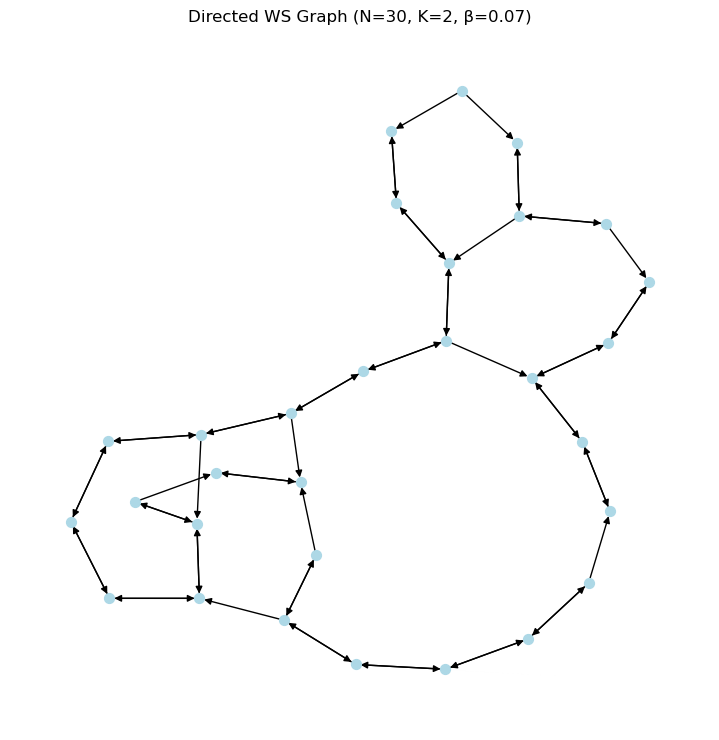

{'average_degree': 1.9666666666666666, 'degree_gini_coefficient': 0.15197740112994348, 'approx_average_clustering_coefficient': 0.0, 'weak_diameter': 10}


In [1]:
import networkx as nx
import pandas as pd

from directed_network_models import *
from network_utils import *

# Create a directed WS graph with 20 nodes, mean out-degree ~4,
# rewiring parameter beta=0.2, no self-loops, and a fixed seed.
L = 30
K = 2
beta = 0.07
G = directed_watts_strogatz_graph(L, K, beta, self_loops=False, seed=42)

# Plot the directed graph using networkx and matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
G_undirected = G.to_undirected()
# Create distance matrix using undirected graph
df = pd.DataFrame(index=G_undirected.nodes(), columns=G_undirected.nodes())
for row, data in nx.shortest_path_length(G_undirected):
    for col, dist in data.items():
        df.loc[row,col] = dist
pos = nx.kamada_kawai_layout(G_undirected, dist=df.to_dict())

nx.draw(G, pos, 
        node_color='lightblue',
        node_size=50,
        arrowsize=10,
        with_labels=False,
        node_shape='o',
        font_size=12,
        font_weight='bold')
plt.title(f"Directed WS Graph (N={L}, K={K}, β={beta})")
plt.show()
print(directed_network_statistics(G))


# Scale-free

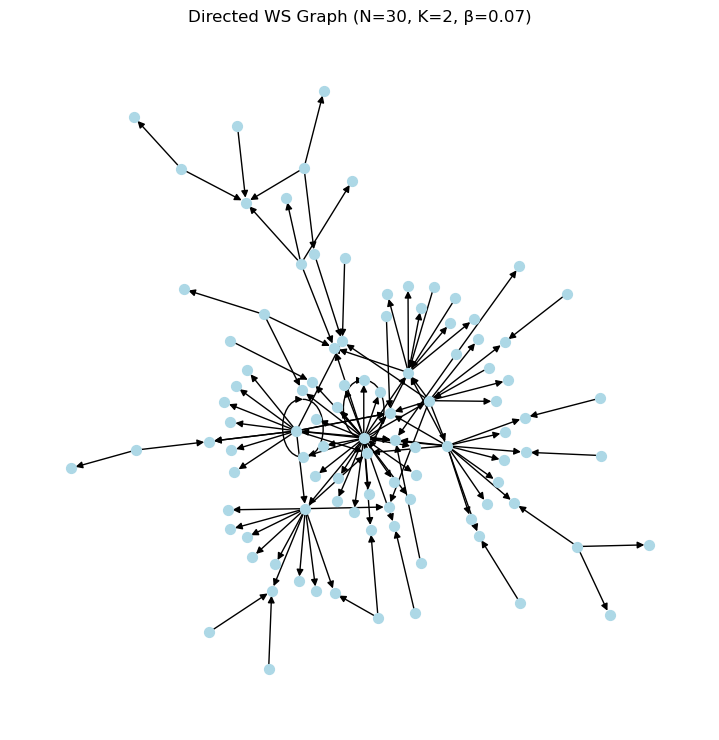

{'average_degree': 1.26, 'degree_gini_coefficient': 0.8776190476190476, 'approx_average_clustering_coefficient': 0.017617221858601168, 'weak_diameter': 9}


In [2]:

G = nx.scale_free_graph(n=100,   
                            alpha=0.2,
                            beta=0.2,
                            gamma=0.6,
                            delta_in=0.5,
                            delta_out=0.1,
                            seed=42,)

# Plot the directed graph using networkx and matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
G_undirected = G.to_undirected()
# Create distance matrix using undirected graph
df = pd.DataFrame(index=G_undirected.nodes(), columns=G_undirected.nodes())
for row, data in nx.shortest_path_length(G_undirected):
    for col, dist in data.items():
        df.loc[row,col] = dist
pos = nx.kamada_kawai_layout(G_undirected, dist=df.to_dict())

nx.draw(G, pos, 
        node_color='lightblue',
        node_size=50,
        arrowsize=10,
        with_labels=False,
        node_shape='o',
        font_size=12,
        font_weight='bold')
plt.title(f"Directed WS Graph (N={L}, K={K}, β={beta})")
plt.show()
print(directed_network_statistics(G))


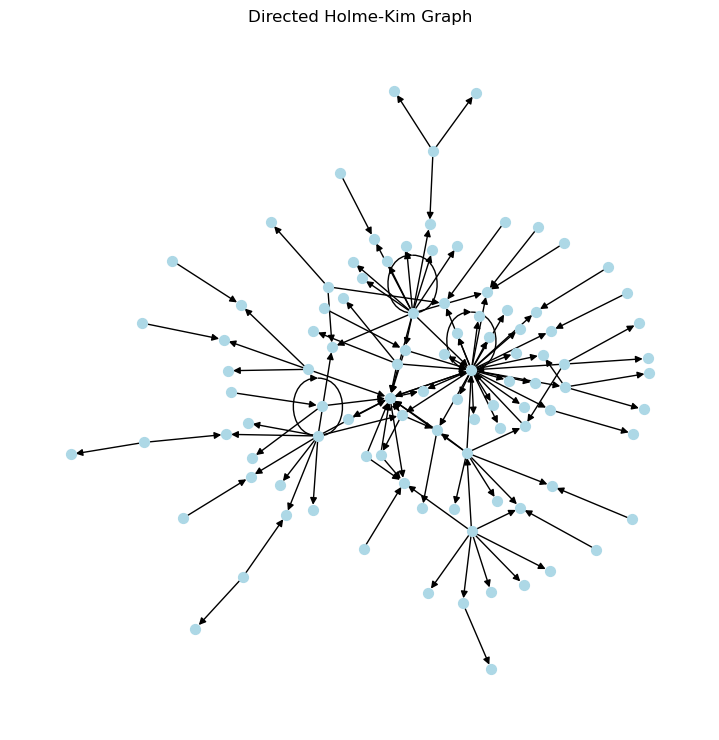

{'average_degree': 1.26, 'degree_gini_coefficient': 0.8273015873015873, 'approx_average_clustering_coefficient': 0.0745043719721139, 'weak_diameter': 8}


In [3]:

G = directed_holme_kim_graph(n=100,   
                            alpha=0.2,
                            beta=0.2,
                            gamma=0.6,
                            delta_in=0.5,
                            delta_out=0.1,
                            p=0.95,
                            seed=42,
                            initial_graph=None,)

# Plot the directed graph using networkx and matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

G_undirected = G.to_undirected()
# Create distance matrix using undirected graph
df = pd.DataFrame(index=G_undirected.nodes(), columns=G_undirected.nodes())
for row, data in nx.shortest_path_length(G_undirected):
    for col, dist in data.items():
        df.loc[row,col] = dist
pos = nx.kamada_kawai_layout(G_undirected, dist=df.to_dict())



#pos = nx.spring_layout(G,iterations=10000,threshold=0.00001)  # Changed to spring_layout for better visualization
nx.draw(G, pos, 
        node_color='lightblue',
        node_size=50,
        arrowsize=10,
        with_labels=False,
        node_shape='o',
        font_size=12,
        font_weight='bold')
plt.title(f"Directed Holme-Kim Graph")
plt.show()
print(directed_network_statistics(G))


/Users/Noich001/miniforge3/envs/network_epist_playground/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:312: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


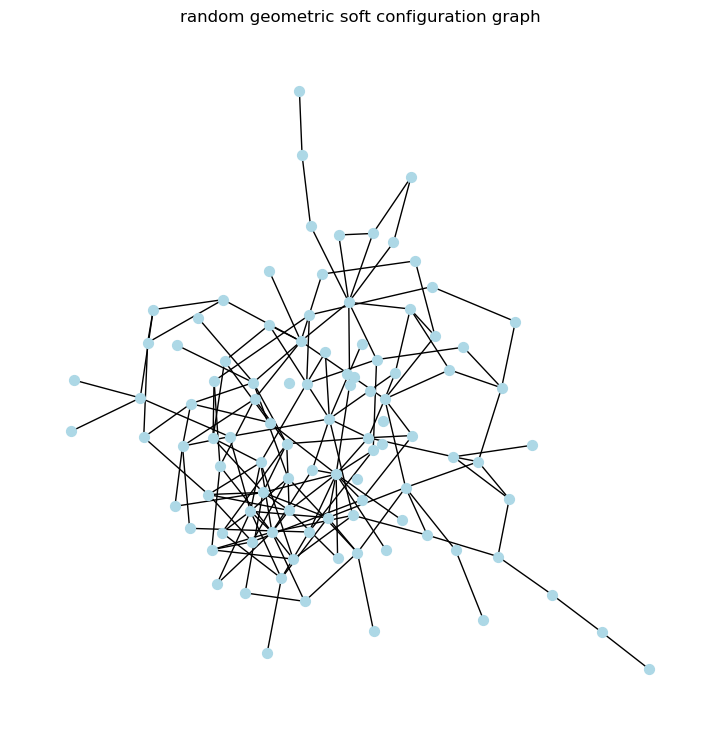

{'average_degree': 3.28, 'degree_gini_coefficient': 0.37213414634146336, 'approx_average_clustering_coefficient': 0.1022032967032967, 'diameter': 11}


In [4]:
import matplotlib.pyplot as plt


G = nx.geometric_soft_configuration_graph(
    beta=1,       # a bit > 1 for decent clustering
    n=100,          # moderate size
    gamma=3,      # typical for hidden-degree power law
    mean_degree=3,  # want an average ~5 if it were undirected
)
plt.figure(figsize=(7, 7))

G_undirected = G.to_undirected()
# Create distance matrix using undirected graph
df = pd.DataFrame(index=G_undirected.nodes(), columns=G_undirected.nodes())
for row, data in nx.shortest_path_length(G_undirected):
    for col, dist in data.items():
        df.loc[row,col] = dist
pos = nx.kamada_kawai_layout(G_undirected)#, dist=df.to_dict())


#pos = nx.spring_layout(G,iterations=10000,threshold=0.00001)  # Changed to spring_layout for better visualization
nx.draw(G, pos, 
        node_color='lightblue',
        node_size=50,
        arrowsize=20,
        with_labels=False,
        node_shape='o',
        font_size=12,
        font_weight='bold')
plt.title(f"random geometric soft configuration graph")
plt.show()
print(network_statistics(G))


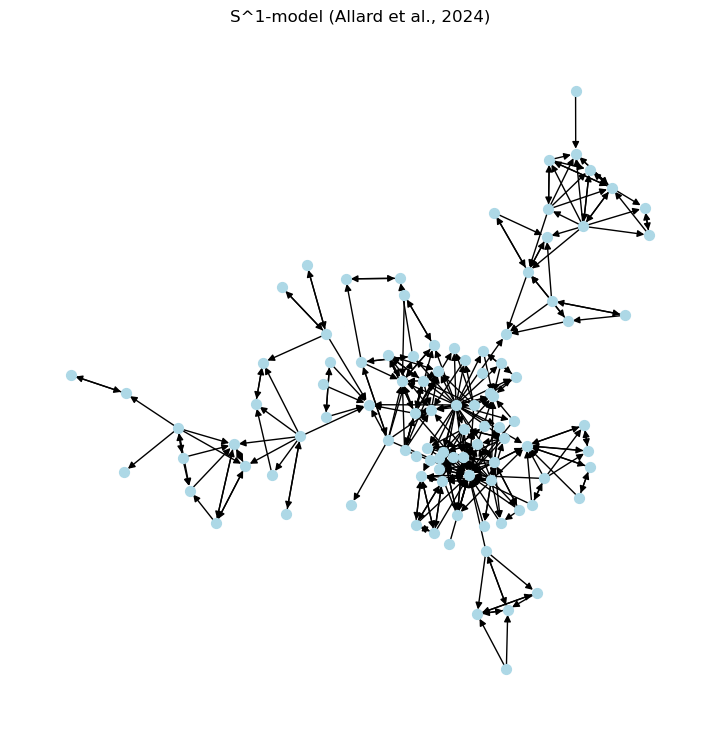

{'average_degree': 3.07, 'degree_gini_coefficient': 0.5227035830618892, 'approx_average_clustering_coefficient': 0.54755980930271, 'weak_diameter': 11}


In [5]:
import math
import random
import numpy as np
import scipy.stats as st
import networkx as nx



G= generate_directed_s1_networkx(
n=100,
beta=10.,
kappa_min=1,
kappa_max=100,
gamma=2.5,
#mu=0.008,
nu=0.01,
seed=12345
)


plt.figure(figsize=(7, 7))

G_undirected = G.to_undirected()
# Create distance matrix using undirected graph
df = pd.DataFrame(index=G_undirected.nodes(), columns=G_undirected.nodes())
for row, data in nx.shortest_path_length(G_undirected):
    for col, dist in data.items():
        df.loc[row,col] = dist
pos = nx.kamada_kawai_layout(G_undirected)#, dist=df.to_dict())


#pos = nx.spring_layout(G,iterations=10000,threshold=0.00001)  # Changed to spring_layout for better visualization
nx.draw(G, pos, 
        node_color='lightblue',
        node_size=50,
        arrowsize=10,
        with_labels=False,
        node_shape='o',
        font_size=12,
        font_weight='bold')
plt.title(f"S^1-model (Allard et al., 2024)")
plt.show()

print(directed_network_statistics(G))



